# 5. Re-designing using Elastic Net

In [ ]:
#Basic scientific math, data shape, and data file libraries for data pre-processing
import io 
import numpy as np 
import pandas as pd

#Plotting 
from matplotlib import pyplot as plt

#5.1
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import make_scorer, mean_squared_error
from sklearn.linear_model import ElasticNet

## Load data

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#Load data
robo_bohr = pd.read_csv('/content/gdrive/My Drive/DS/molecules/roboBohr.csv')
robo_bohr 

,Unnamed: 0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,12.342823,12.335925,12.328055,12.284265,12.269844,12.247357,10.557967,10.473721,9.225262,8.448526,7.611145,7.610874,7.580510,7.579386,7.576929,7.536001,7.517317,7.462578,7.459865,7.456214,7.447581,7.443458,7.423496,7.345785,7.323741,7.247088,7.230886,6.662523,6.286251,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,15.202985,14.800045,12.855629,12.728858,12.618058,12.589962,12.557323,12.074893,10.607138,10.572061,10.464293,9.816674,9.456914,9.455816,8.865704,8.104048,8.006855,7.968817,7.946644,7.932943,7.922656,7.888724,7.885692,7.783220,7.637477,7.636586,7.631457,7.336591,7.127698,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,7.607776,7.550253,7.446675,7.398848,7.381532,7.355045,7.321944,6.625986,6.116315,6.106397,6.098066,5.989868,5.731750,5.700963,5.371527,5.008911,4.894453,4.826545,4.352232,4.270598,2.902330,2.902220,2.901834,2.901089,2.900168,2.900151,2.899983,2.898772,2.898551,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,12.420665,12.410312,12.346845,12.175480,12.098758,10.612802,10.610273,10.606738,10.606702,10.433290,8.694957,8.421582,8.103569,8.103345,7.595619,7.566897,7.555411,7.413109,7.403199,7.185256,6.915425,6.198245,6.191266,6.181797,6.152544,5.252689,5.244354,5.176740,5.176314,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,10.485270,8.595823,8.103880,8.103567,7.975189,7.546413,7.503300,6.803380,6.738768,5.169492,5.161869,5.145972,4.924911,4.899245,4.534996,4.486310,3.897466,3.081523,2.957823,2.903069,2.902178,2.900610,2.900542,2.900306,2.899368,2.899113,2.897739,2.896793,2.896063,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,16268,73.516695,20.753166,18.624076,17.872009,17.851690,17.851254,17.742176,14.655754,12.706683,12.557785,12.557113,10.855517,10.612536,10.606837,10.606647,10.575946,10.546340,9.328498,9.319485,9.295251,8.103619,8.059486,6.733081,6.025705,5.353745,5.345835,5.343937,5.200625,5.190235,5.176243,5.175604,4.741453,4.352078,4.247954,4.224297,4.218675,4.030840,3.982557,3.980375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,74976,-8.876123
16238,16269,73.516695,20.724740,18.579933,17.741621,14.716676,13.697829,13.

## Data pre-processing

In [ ]:
X = robo_bohr.drop(['Eat'], axis = 1)
y = robo_bohr['Eat']

In [ ]:
standardize = StandardScaler()
y_center = StandardScaler(with_std = False)

In [ ]:
X= standardize.fit_transform(X)
X = pd.DataFrame(X)

In [ ]:
X

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1237,1238,1239,1240,1241,1242,1243,1244,1245,1246,1247,1248,1249,1250,1251,1252,1253,1254,1255,1256,1257,1258,1259,1260,1261,1262,1263,1264,1265,1266,1267,1268,1269,1270,1271,1272,1273,1274,1275,1276
0,-1.732434,-0.372795,-0.534448,-1.043596,-0.936145,-0.855299,-0.806195,-0.695008,-0.583679,-0.468653,-0.349884,-0.221627,-0.065608,0.062540,0.179290,0.300685,0.420515,0.007942,0.092473,-0.207349,-0.360969,-0.549788,-0.463998,-0.370329,-0.292462,-0.221652,-0.164753,-0.101778,-0.057160,0.008425,0.082285,0.136817,0.191847,0.237371,0.260036,0.303121,0.323988,0.367307,0.206235,0.107752,...,-0.049017,-0.049018,-0.049015,5.205799,-0.049012,-0.049014,-0.049013,-0.049015,-0.049014,-0.049015,-0.049014,5.897061,-0.049015,-0.049016,-0.049018,-0.049017,-0.049016,-0.049014,6.699355,-0.049014,-0.049016,-0.049013,-0.049013,-0.049016,7.794655,-0.049018,-0.049018,-0.049018,-0.049017,9.071511,-0.049014,-0.049015,-0.049013,11.309499,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345475
1,-1.732221,-0.372795,-0.207476,-0.253760,-0.098378,0.130369,0.491641,0.699988,0.930156,0.567022,0.561288,0.749366,0.739378,0.232981,0.321935,0.411264,0.530913,0.643447,0.605935,0.240441,0.334565,0.395303,0.276617,0.257720,0.346045,0.225058,0.036131,0.073811,0.126871,0.186834,0.256199,0.310968,0.357017,0.410245,0.424948,0.422109,0.472768,0.520711,0.463869,0.430216,...,-0.049017,-0.049018,-0.049015,-0.192093,-0.049012,-0.049014,-0.049013,-0.049015,-0.049014,-0.049015,-0.049014,-0.169576,-0.049015,-0.049016,-0.049018,-0.049017,-0.049016,-0.049014,-0.149268,-0.049014,-0.049016,-0.049013,-0.049013,-0.049016,-0.128293,-0.049018,-0.049018,-0.049018,-0.049017,-0.110235,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345432
2,-1.732008,-0.372795,-0.532992,-1.038028,-0.944372,-0.866204,-0.819541,-0.722963,-0.637582,-1.053761,-1.517533,-1.829122,-1.629004,-1.514467,-1.388161,-1.251650,-1.155949,-1.020643,-1.141414,-1.214787,-1.128101,-1.050987,-1.008263,-0.989126,-0.931647,-0.986079,-1.058433,-1.042555,-1.015427,-1.130550,-1.079852,-1.529368,-1.492713,-1.453857,-1.415615,-1.374569,-1.336446,-1.291267,-1.232299,-1.190506,...,-0.049017,-0.049018,-0.049015,-0.192093,-0.049012,-0.049014,-0.049013,-0.049015,-0.049014,-0.049015,-0.049014,-0.169576,-0.049015,-0.049016,-0.049018,-0.049017,-0.049016,-0.049014,-0.149268,-0.049014,-0.049016,-0.049013,-0.049013,-0.049016,-0.128293,-0.049018,-0.049018,-0.049018,-0.049017,-0.110235,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345390
3,-1.731796,-0.372795,-0.527745,-0.339355,-0.102870,0.123643,0.486547,-0.662823,-0.546362,-0.429896,-0.324998,-0.195200,-0.041307,0.068610,0.144388,0.246355,-0.106192,0.024568,0.135129,0.240300,0.289112,-0.190781,-0.191796,-0.195257,-0.114170,-0.215174,-0.153827,-0.088114,-0.075143,-0.012344,-0.016563,-0.058260,-0.270062,-0.223518,-0.178788,-0.141069,-0.437828,-0.393460,-0.361642,-0.317606,...,-0.049017,-0.049018,-0.049015,-0.192093,-0.049012,-0.049014,-0.049013,-0.049015,-0.049014,-0.049015,-0.049014,-0.169576,-0.049015,-0.049016,-0.049018,-0.049017,-0.049016,-0.049014,-0.149268,-0.049014,-0.049016,-0.049013,-0.049013,-0.049016,-0.128293,-0.049018,-0.049018,-0.049018,-0.049017,-0.110235,-0.049014,-0.049015,-0.049013,-0.088421,-0.04901,-0.049013,-0.065791,-0.049013,-0.049061,-0.345262
4,-1.731583,-0.372795,-0.526820,-0.339746,-0.102590,0.117769,-0.791526,-0.680220,-0.577064,-1.001983,-0.913487,-0.852245,-1.287434,-1.302146,-1.162057,-1.063128,-1.094284,-0.962998,-1.084527,-1.013084,-1.434970,-1.361098,-1.291608,-1.259182,-1.204453,-1.276033,-1.243245,-1.400157,-1.649788,-1.641613,-1.578737,-1.529424,-1.493311,-1.454340,-1.415910,-1.374873,-1.336843,-1.292126,-1.233056,-1.191459,...,-0.049017,-0.049018,-0.049015,-0.192093,-0.049012,-0.049014,-0.049013,-0.049015,-0.049014,-0.049015,-0.049014,-0.169576,-0.049

In [ ]:
y -= np.mean(y)
y

0       -7.834793
1        1.017950
2        1.802350
3       -2.597469
4        2.641829
           ...   
16237    2.302846
16238   -1.926299
16239   -5.622495
16240   -2.156118
16241   -2.157726
Name: Eat, Length: 16242, dtype: float64

##5.1 Illustrating the effect of the tuning parameter on the inferred elastic net regression coefficients using machine learning libraries in Python

Plot with alpha = 0

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
lambdas = [10e-2, 10e-1, 10e0, 10e1, 10e2,10e3,10e4, 10e5, 10e6]
beta_list = []

for lamb in lambdas:
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 0, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5802.816606480962, tolerance: 21.74548536217884
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 9548.776425330416, tolerance: 21.74548536217884
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18078.63754435659, tolerance: 21.74548536217884
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36922.769675

No handles with labels found to put in legend.


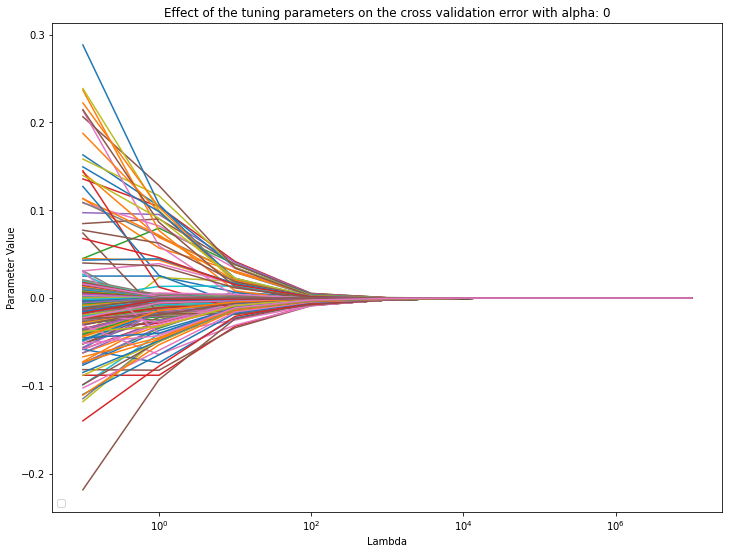

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 0")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

Plot with alpha = 0.2

In [ ]:
lambdas = [10**-2, 10**-1,1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list = []

for lamb in lambdas: 
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 0.2, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 401.61101166230947, tolerance: 21.74548536217884
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 103.4823710928631, tolerance: 21.74548536217884
  positive)


No handles with labels found to put in legend.


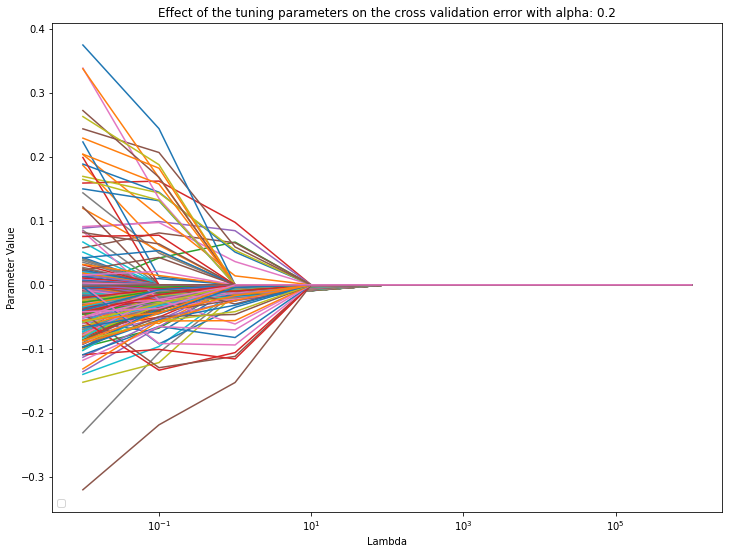

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 0.2")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

Plot with alpha = 0.4

In [ ]:
lambdas = [10**-2, 10**-1,1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list = []

for lamb in lambdas: 
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 0.4, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 107.71079126733275, tolerance: 21.74548536217884
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.193764397405175, tolerance: 21.74548536217884
  positive)


No handles with labels found to put in legend.


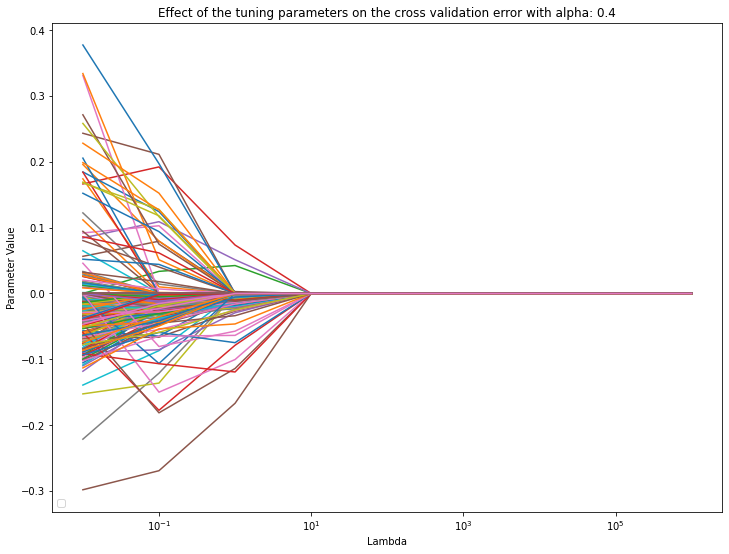

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 0.4")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

Plot with alpha = 0.6

In [ ]:
lambdas = [10**-2, 10**-1,1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list = []

for lamb in lambdas: 
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 0.6, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 42.778526988658996, tolerance: 21.74548536217884
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.956770515633252, tolerance: 21.74548536217884
  positive)


No handles with labels found to put in legend.


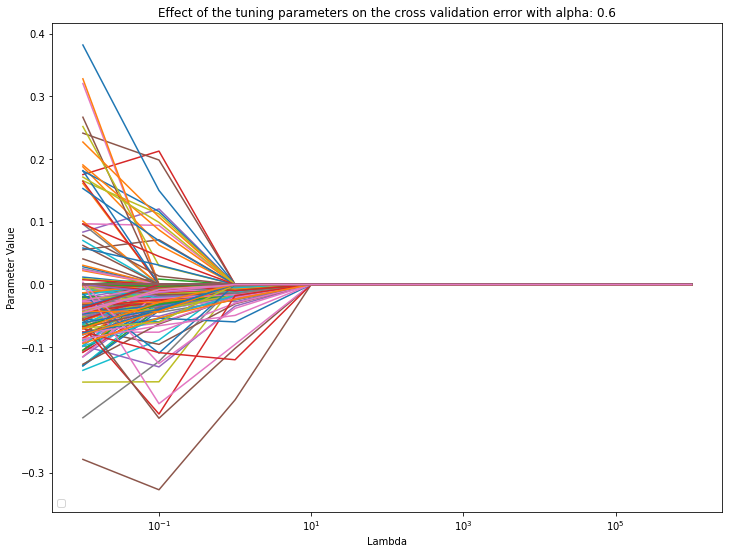

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 0.6")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

Plot with alpha = 0.8

In [ ]:
lambdas = [10**-2, 10**-1,1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list = []

for lamb in lambdas: 
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 0.8, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26.552071401221838, tolerance: 21.74548536217884
  positive)


No handles with labels found to put in legend.


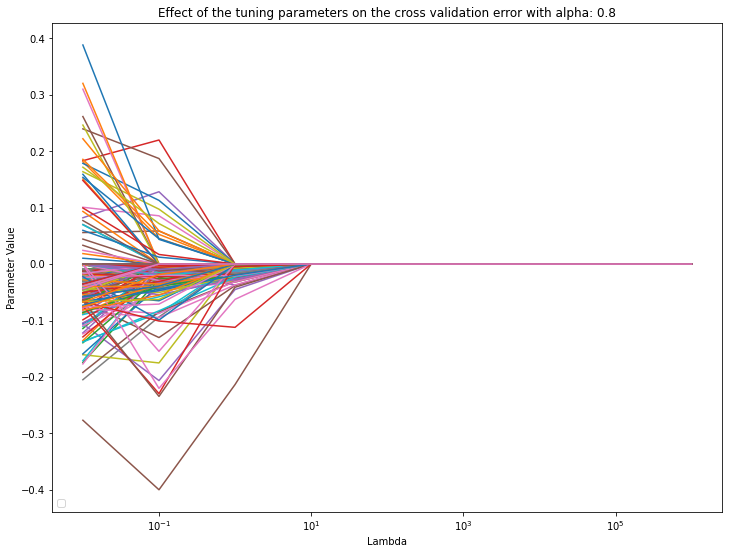

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 0.8")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

Plot with alpha = 1

In [ ]:
lambdas = [10**-2, 10**-1,1, 10, 10**2, 10**3, 10**4, 10**5, 10**6]
beta_list = []

for lamb in lambdas: 
  elastic_net = ElasticNet(alpha = lamb, l1_ratio = 1, max_iter = 1000)
  elastic_net.fit(X,y)
  beta_list.append(elastic_net.coef_)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 28.660900781636883, tolerance: 21.74548536217884
  positive)


No handles with labels found to put in legend.


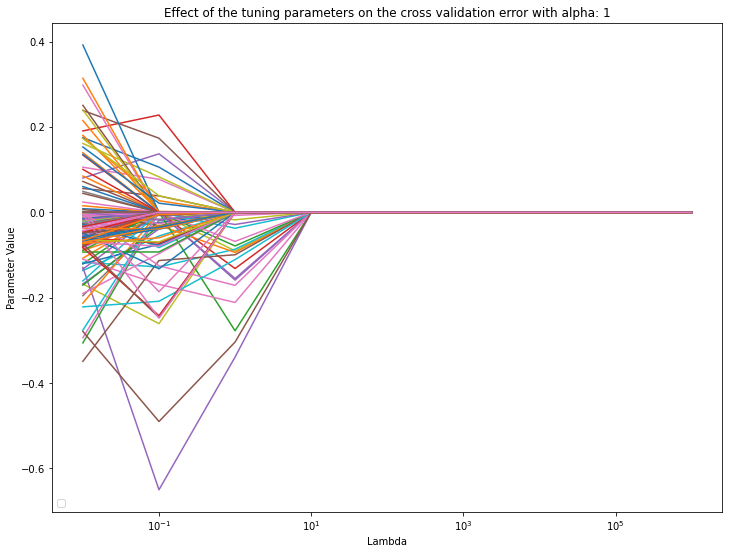

In [ ]:
#Define plotting code
betas = pd.DataFrame(beta_list)
betas.index = lambdas 

plt.figure(figsize=(12,9))
plt.plot(betas)
plt.title("Effect of the tuning parameters on the cross validation error with alpha: 1")
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Parameter Value')
plt.legend(loc = 'lower left')
plt.show()

## 5.2 Displaying the effect of the tuning parameter on the cross validation error

In [ ]:
from sklearn.model_selection import GridSearchCV

elastic_net = ElasticNet(max_iter = 1000)
parameters = {'alpha': [1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6], 'l1_ratio':[0,0.2,0.4,0.6,0.8,1]}
mse = make_scorer(mean_squared_error, greater_is_better = False)
elastic_regressor = GridSearchCV(elastic_net,parameters,scoring = mse, cv = 5, refit=False)
elastic_regressor.fit(X,y)
elastic_regressor.cv_results_['mean_test_score']

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3987.7714809369177, tolerance: 17.464462779812038
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3453.535675992744, tolerance: 16.788028237445555
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3693.72001765536, tolerance: 17.44694355344353
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3869.88919

array([ -0.80252286,  -0.77955365,  -0.78459764,  -0.78109935,
        -0.78717371,  -0.79752685,  -0.73709532,  -0.81380132,
        -0.91712713,  -1.00094406,  -1.07846239,  -1.14937691,
        -0.94468925,  -1.53281034,  -2.03743885,  -2.58465042,
        -3.0565806 ,  -3.58326499,  -1.71358708,  -7.5646749 ,
       -13.79501047, -13.79501047, -13.79501047, -13.79501047,
        -3.03117689, -13.79501047, -13.79501047, -13.79501047,
       -13.79501047, -13.79501047,  -7.65109897, -13.79501047,
       -13.79501047, -13.79501047, -13.79501047, -13.79501047,
       -12.63182974, -13.79501047, -13.79501047, -13.79501047,
       -13.79501047, -13.79501047, -13.6675436 , -13.79501047,
       -13.79501047, -13.79501047, -13.79501047, -13.79501047,
       -13.78214098, -13.79501047, -13.79501047, -13.79501047,
       -13.79501047, -13.79501047])

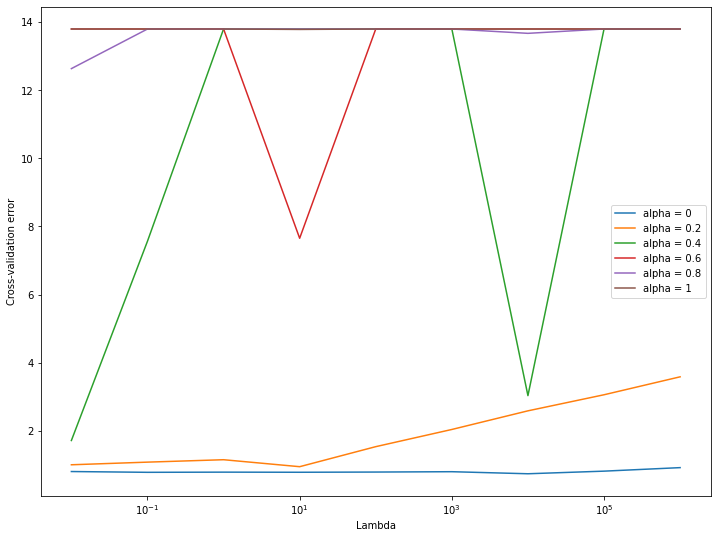

In [ ]:
plt.figure(figsize=(12,9))
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][0:9]), label = 'alpha = 0')
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][9:18]), label = 'alpha = 0.2')
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][18:27]), label = 'alpha = 0.4')
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][27:36]), label = 'alpha = 0.6')
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][36:45]), label = 'alpha = 0.8')
plt.plot(lambdas, np.absolute(elastic_regressor.cv_results_['mean_test_score'][45:54]), label = 'alpha = 1')
plt.xscale('log')
plt.xlabel('Lambda')
plt.ylabel('Cross-validation error')
plt.legend()
plt.show()

## 5.3 Showing the value of λ that generated the smallest CV(5) error.

In [ ]:
print(elastic_regressor.best_params_)
print(elastic_regressor.best_score_)

{'alpha': 0.1, 'l1_ratio': 0}
-0.737095320051265


The smallest value of lambda that generated the smallest CV(5) error is lambda = 0.1 and alpha = 0. WHY?

>>How do these estimates compare to the estimates obtained from ridge regression (𝛼 = 1
under optimal 𝜆 for 𝛼 = 1000) and lasso (𝛼 = 0 under optimal 𝜆 for 𝛼 = 0) on the entire
dataset of 𝑁 = 16242 observations?

##5.4 Retraining the model on the entire dataset of N = 16242 observations and providing the estimates of the p = 1275 best-fit model parameters using the optimal value of lambda and alpha.

In [ ]:
elastic_net = ElasticNet(alpha = 0.1,l1_ratio = 0, max_iter = 1000)
elastic_net.fit(X,y)
elastic_net.coef_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5802.816606480962, tolerance: 21.74548536217884
  positive)


array([ 0.02496742,  0.11331676,  0.04502933, ..., -0.00541024,
       -0.0113289 , -0.05165106])

In [ ]:
elastic_net = ElasticNet(alpha = 10e-2, l1_ratio = 1, max_iter = 1000)
elastic_net.fit(X,y)
elastic_net.coef_

array([ 0.,  0.,  0., ..., -0., -0., -0.])

In [ ]:
elastic_net = ElasticNet(alpha = 10e-2, l1_ratio = 0.8, max_iter = 1000)
elastic_net.fit(X,y)
elastic_net.coef_

array([ 0.,  0.,  0., ..., -0., -0., -0.])

>>Based on the estimation coefficients, it appears that estimation coefficients with lasso penalizing term are better than ridge for this dataset. Then, we may assume that ridge parameters will produce a higher error. 